In [ ]:
!pip install keras-cv==0.6.1 keras-core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.2/756.2 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 57.8 MB/s eta 0:00:00


In [ ]:
import time
import keras_cv
from tensorflow import keras
import matplotlib.pyplot as plt

Using TensorFlow backend


In [ ]:
def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")

In [ ]:
keras.mixed_precision.set_global_policy("mixed_float16")

In [ ]:
model = keras_cv.models.StableDiffusion(jit_compile=False)

print("Compute dtype:", model.diffusion_model.compute_dtype)
print("Variable dtype:",model.diffusion_model.variable_dtype)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
3439090152/3439090152 [==============================] - 16s 0us/step
Compute dtype: float16
Variable dtype: float32


In [ ]:
# Warm up model to run graph tracing before benchmarking.
images = model.text_to_image(
    "Tranquil Sky Haven, Peaceful Expression, Oil Painting, Detailed, "
    "Calming, Harmonious, intricate details",
    batch_size=3
)
plot_images(images)

198180272/198180272 [==============================] - 1s 0us/step


50/50 [==============================] - 63s 1s/step
Mixed precision model: 64.39 seconds


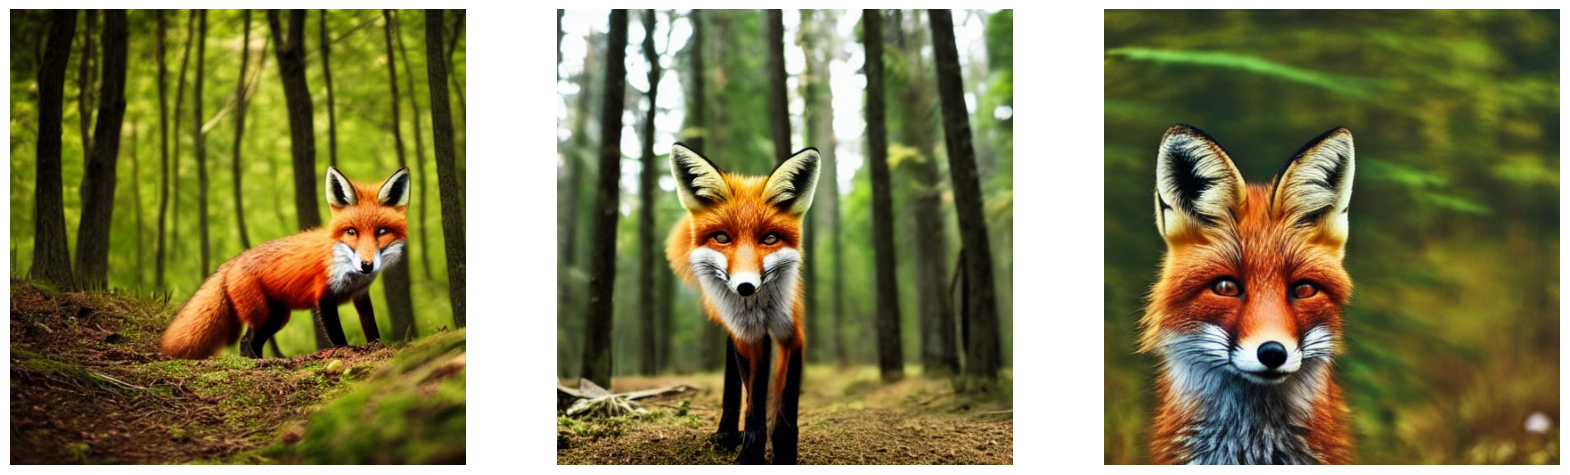

In [ ]:
start = time.time()
images = model.text_to_image(
    "Curious fox exploring a forest, side look, realistic photography, "
    "detailed portrait, earthy colors",
    batch_size=3,
)
end = time.time()
plot_images(images)

print(f"Mixed precision model: {(end - start):.2f} seconds")

In [ ]:
keras.backend.clear_session()

In [ ]:
# Set back to the default for benchmarking purposes.
keras.mixed_precision.set_global_policy("float32")

model = keras_cv.models.StableDiffusion(jit_compile=True)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


In [ ]:
# Warmup
images = model.text_to_image("An avocado armchair", batch_size=3)
plot_images(images)

50/50 [==============================] - 202s 2s/step


50/50 [==============================] - 97s 2s/step
With XLA: 99.98 seconds


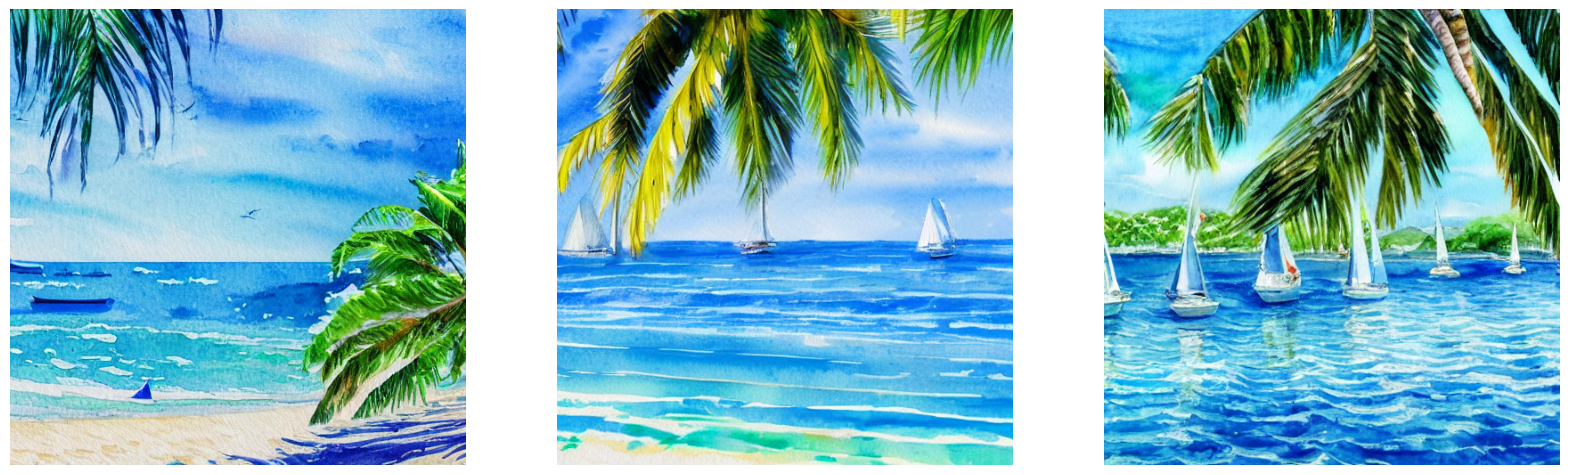

In [ ]:
start = time.time()
images = model.text_to_image(
    "Blue Ocean and White Sailboats in a Tropical Paradise, Impressionist, "
    "Vibrant, Detailed, Watercolor-like rendering, Serene, Nautical, "
    "Lush, Exquisite, 4k, 8k",
    batch_size=3,
)
end = time.time()
plot_images(images)

print(f"With XLA: {(end - start):.2f} seconds")
keras.backend.clear_session()

![](https://deeplearningcourses.com/notebooks_v3_pxl?sc=ex-eQ78bX-OkBhZtY7hLjg&n=Stable+Diffusion+2)